In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

# Optics for water

## Absorption and scattering

In [14]:
data = np.genfromtxt('Optics/Fewell_AO348325_Data_File_1.csv', delimiter = ',', skip_header=3).T

data_ab = data[:3] #wavelength (nm)	pure water value 	pure water uncertainty

#https://bg.copernicus.org/articles/4/1041/2007/bg-4-1041-2007.pdf
# doesn't really match what Soud had in his graphs
data = np.genfromtxt('Optics/scattering.csv', delimiter = ',')

data_sca = data[:,1:]

In [5]:
# print(data_sca)

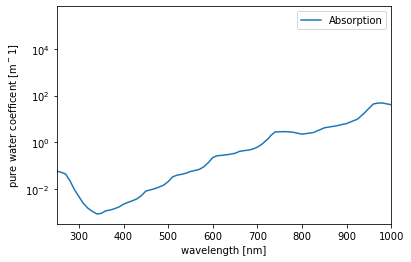

In [6]:
# plt.plot(data[0], data[1])
plt.semilogy(data_ab[0], data_ab[1], label="Absorption")

# plt.plot(data_sca[0], data_sca[1], label="scattering")

plt.xlabel("wavelength [nm]")
plt.ylabel("pure water coefficent [m$^-1$]")

plt.xlim(250, 1000)
plt.legend()
plt.show()

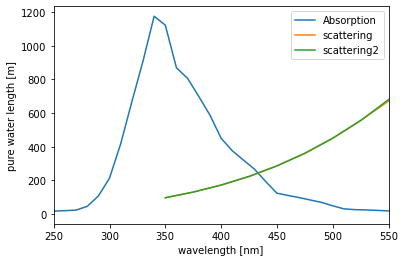

In [7]:
plt.plot(data_ab[0], 1/data_ab[1], label="Absorption")

plt.plot(data_sca[0], 1/(data_sca[2]*1e-4), label="scattering")
plt.plot(data_sca[0], 1/(data_sca[3]*1e-4), label="scattering2")

plt.xlabel("wavelength [nm]")
plt.ylabel("pure water length [m]")

plt.xlim(250, 550)
plt.legend()
plt.show()

### index of refraction

In [15]:
data = np.genfromtxt('Optics/Huibers1997_Table1.csv', delimiter = ',', skip_header=1).T

data_i1a = data[:2,:-8]
data_i1b = data[2:]

In [9]:
# print(data_i1b)

In [10]:
H2OEnergy = np.array([1.03,  1.926,
              2.583, 2.845, 2.857, 3.124,
              3.457, 3.643, 3.812, 4.086]) #eV

H2ORefractiveIndex = np.array([1.3239,   1.3313,
              1.3358, 1.3376, 1.3376, 1.3392,
              1.3423, 1.3442, 1.3460, 1.3486])

H2OImagRefractiveIndex = np.array([0.000012279, 1.5774e-8,
              9.48e-10, 1.1791e-9, 1.1996e-9, 2.0649e-9,
              5.4624e-9, 8.1623e-9, 1.0757e-8, 1.5285e-8])

#commented out values?
H2OEnergy_2 = np.array([0.602, 0.689, 1.03,  1.926,
              2.583, 2.845, 2.857, 3.124,
              3.457, 3.643, 3.812, 4.086,
              4.511, 4.953, 5.474, 6.262,
              7.000, 8.300, 10.00, 12.60])

H2ORefractiveIndex_2 = np.array([ 1.303,  1.3120,   1.3239,   1.3313,
              1.3358, 1.3376, 1.3376, 1.3392,
              1.3423, 1.3442, 1.3460, 1.3486,
              1.3540, 1.3619, 1.3723, 1.3960,
              1.3960, 1.3960,1.3960, 1.3960])

h = con.physical_constants['Planck constant in eV/Hz'][0]
c = con.c #m/s

def eVtoWavelength(E): #eV to nm
    return h*c/E * 1e9

In [11]:
# print(eVtoWavelength(H2OEnergy))

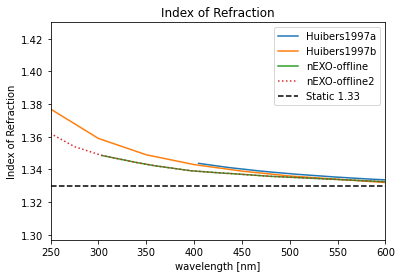

In [12]:
plt.plot(data_i1a[0], data_i1a[1], label="Huibers1997a")
plt.plot(data_i1b[0], data_i1b[1], label="Huibers1997b")

plt.plot(eVtoWavelength(H2OEnergy), H2ORefractiveIndex, label="nEXO-offline")
plt.plot(eVtoWavelength(H2OEnergy_2), H2ORefractiveIndex_2, label="nEXO-offline2", ls=":")


plt.axhline(y=1.33, color="black", ls="--", label="Static 1.33")

plt.xlabel("wavelength [nm]")
plt.ylabel("Index of Refraction")
plt.title("Index of Refraction")

plt.xlim(250, 600)
plt.legend()
plt.show()